In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [4]:
data= pd.read_csv("/kaggle/input/amazonsalesreport/Amazon Sale Report.csv",low_memory=False)

In [5]:
data.head()

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,...,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,promotion-ids,B2B,fulfilled-by,Unnamed: 22
0,0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Amazon.in,Standard,SET389,SET389-KR-NP-S,Set,...,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,NaN,False,Easy Ship,NaN
1,1,171-9198151-1101146,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,JNE3781,JNE3781-KR-XXXL,kurta,...,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,Amazon PLCC Free-Financing Universal Merchant ...,False,Easy Ship,NaN
2,2,404-0687676-7273146,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3371,JNE3371-KR-XL,kurta,...,INR,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,True,NaN,NaN
3,3,403-9615377-8133951,04-30-22,Cancelled,Merchant,Amazon.in,Standard,J0341,J0341-DR-L,Western Dress,...,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,IN,NaN,False,Easy Ship,NaN
4,4,407-1069790-7240320,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3671,JNE3671-TU-XXXL,Top,...,INR,574.00,CHENNAI,TAMIL NADU,600073.0,IN,NaN,False,NaN,NaN


In [6]:
data.columns

Index(['index', 'Order ID', 'Date', 'Status', 'Fulfilment', 'Sales Channel ',
       'ship-service-level', 'Style', 'SKU', 'Category', 'Size', 'ASIN',
       'Courier Status', 'Qty', 'currency', 'Amount', 'ship-city',
       'ship-state', 'ship-postal-code', 'ship-country', 'promotion-ids',
       'B2B', 'fulfilled-by', 'Unnamed: 22'],
      dtype='object')

In [8]:
data.drop(['Unnamed: 22'],inplace=True,axis=1)

In [9]:
data.describe()

,index,Qty,Amount,ship-postal-code
count,128975.000000,128975.000000,121180.000000,128942.000000
mean,64487.000000,0.904431,648.561465,463966.236509
std,37232.019822,0.313354,281.211687,191476.764941
min,0.000000,0.000000,0.000000,110001.000000
25%,32243.500000,1.000000,449.000000,382421.000000
50%,64487.000000,1.000000,605.000000,500033.000000
75%,96730.500000,1.000000,788.000000,600024.000000
max,128974.000000,15.000000,5584.000000,989898.000000


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128975 entries, 0 to 128974
Data columns (total 23 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   index               128975 non-null  int64  
 1   Order ID            128975 non-null  object 
 2   Date                128975 non-null  object 
 3   Status              128975 non-null  object 
 4   Fulfilment          128975 non-null  object 
 5   Sales Channel       128975 non-null  object 
 6   ship-service-level  128975 non-null  object 
 7   Style               128975 non-null  object 
 8   SKU                 128975 non-null  object 
 9   Category            128975 non-null  object 
 10  Size                128975 non-null  object 
 11  ASIN                128975 non-null  object 
 12  Courier Status      122103 non-null  object 
 13  Qty                 128975 non-null  int64  
 14  currency            121180 non-null  object 
 15  Amount              121180 non-nul

In [11]:
data.isna().sum()

index                     0
Order ID                  0
Date                      0
Status                    0
Fulfilment                0
Sales Channel             0
ship-service-level        0
Style                     0
SKU                       0
Category                  0
Size                      0
ASIN                      0
Courier Status         6872
Qty                       0
currency               7795
Amount                 7795
ship-city                33
ship-state               33
ship-postal-code         33
ship-country             33
promotion-ids         49153
B2B                       0
fulfilled-by          89698
dtype: int64

In [12]:
data.dropna(inplace=True)

In [13]:
data.shape

(32338, 23)

In [14]:
data["ship-postal-code"]=data["ship-postal-code"].astype("int")

In [15]:
data["ship-postal-code"].dtypes

dtype('int64')

In [16]:
data["Date"]=pd.to_datetime(data["Date"],format="%m-%d-%y",errors="coerce")

In [20]:
data.rename(columns={"Qty":"Quality"},inplace=True)

In [21]:
data[["Quality","Amount"]].describe()

,Quality,Amount
count,32338.000000,32338.000000
mean,1.004855,651.285979
std,0.085110,284.247292
min,1.000000,0.000000
25%,1.000000,459.000000
50%,1.000000,631.000000
75%,1.000000,771.000000
max,5.000000,5495.000000


# Exploratory Data Analysis

In [22]:
data.columns

Index(['index', 'Order ID', 'Date', 'Status', 'Fulfilment', 'Sales Channel ',
       'ship-service-level', 'Style', 'SKU', 'Category', 'Size', 'ASIN',
       'Courier Status', 'Quality', 'currency', 'Amount', 'ship-city',
       'ship-state', 'ship-postal-code', 'ship-country', 'promotion-ids',
       'B2B', 'fulfilled-by'],
      dtype='object')

<Axes: xlabel='Quality', ylabel='count'>

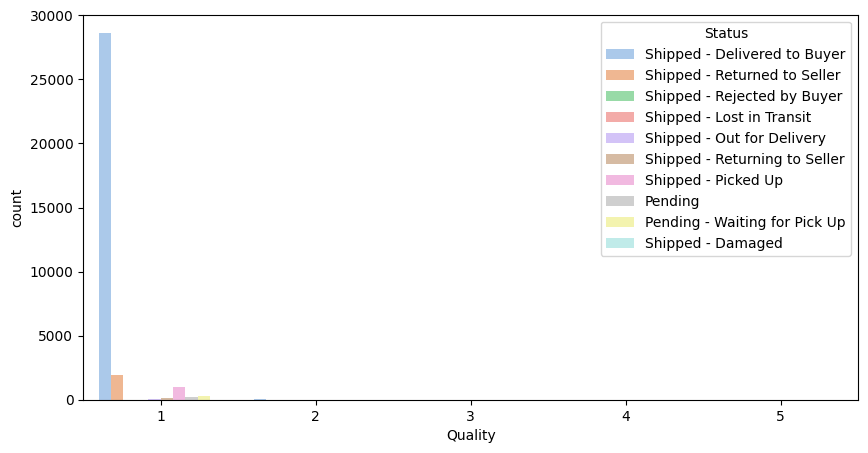

In [97]:
plt.figure(figsize=(10,5))
sns.countplot(x="Quality",data=data,hue="Status",palette="pastel")

<Axes: xlabel='Quality', ylabel='Amount'>

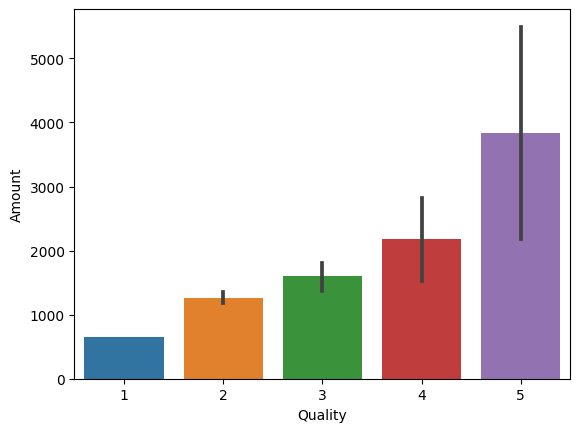

In [32]:
sns.barplot(data=data,x="Quality",y="Amount")

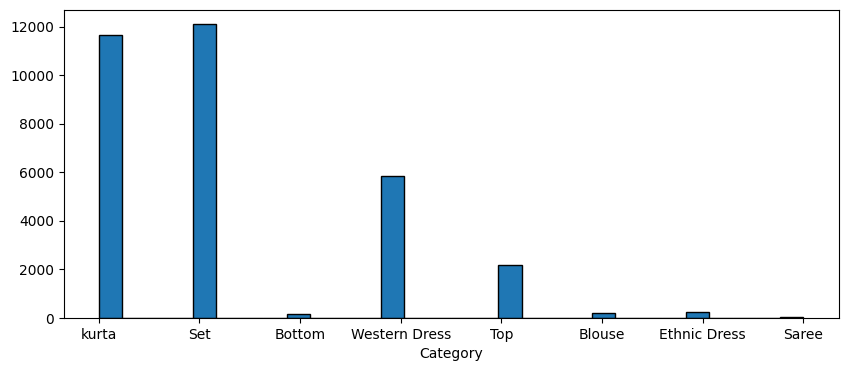

In [93]:
plt.figure(figsize=(10,4))
data['Category'] = data['Category'].astype(str)
columndata=data["Category"]
plt.hist(columndata,bins=30,edgecolor="black")
plt.xlabel("Category")
plt.show()

<Axes: xlabel='Category', ylabel='Amount'>

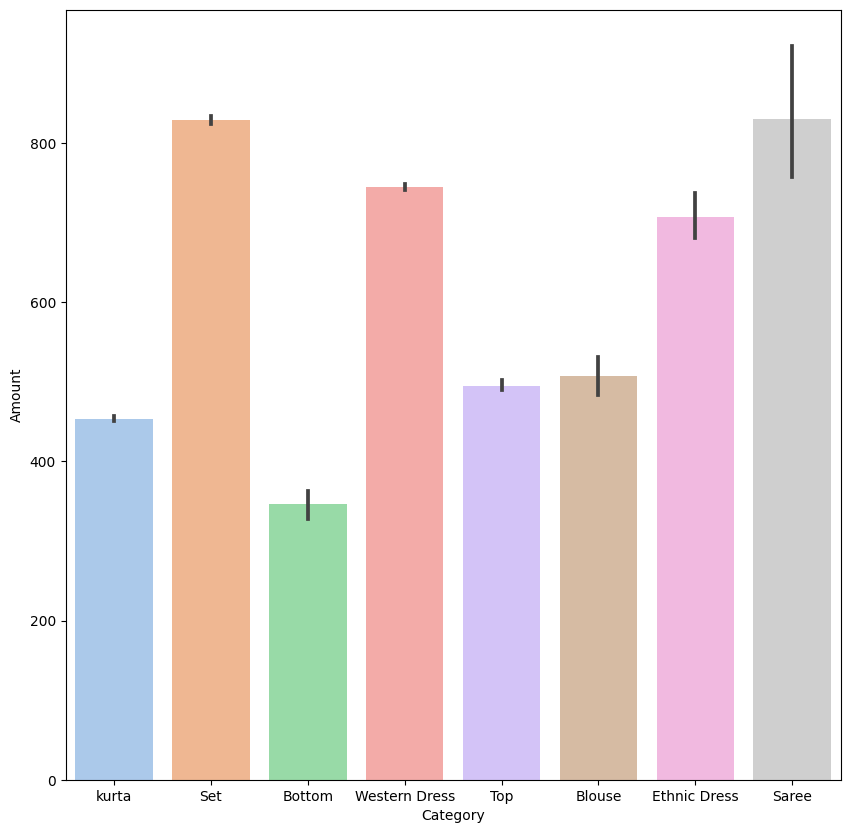

In [83]:
plt.figure(figsize=(10,10))
sns.barplot(data=data,x="Category",y="Amount",palette="pastel")

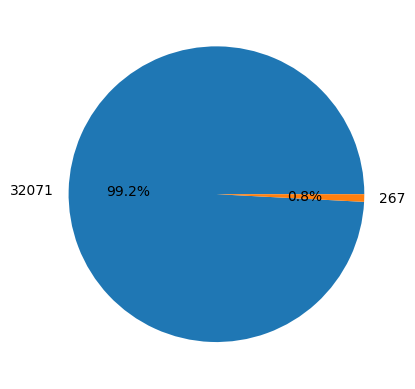

In [43]:
b2b = data["B2B"].value_counts()
plt.pie(b2b,labels=b2b,autopct="%1.1f%%")
plt.show()

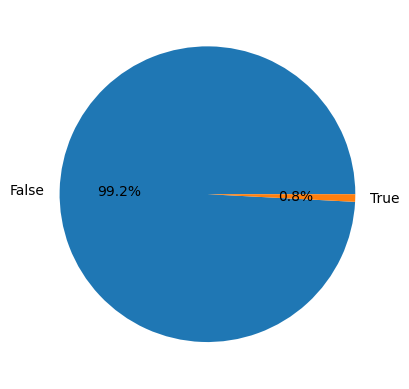

In [44]:
b2b = data["B2B"].value_counts()
plt.pie(b2b,labels=b2b.index,autopct="%1.1f%%")
plt.show()

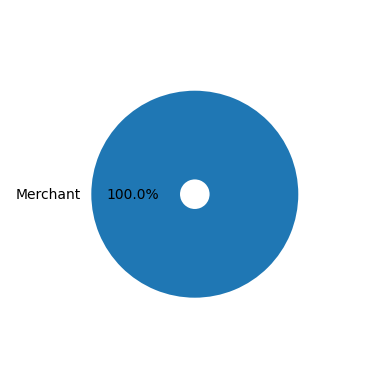

In [99]:
#  Prepare data for pie chart
a1 = data['Fulfilment'].value_counts()
# Step 4: Plot the pie chart
fig, ax = plt.subplots()
ax.pie(a1, labels=a1.index, autopct='%1.1f%%', radius=0.7, wedgeprops=dict(width=0.6))
ax.set(aspect="equal")
plt.show()

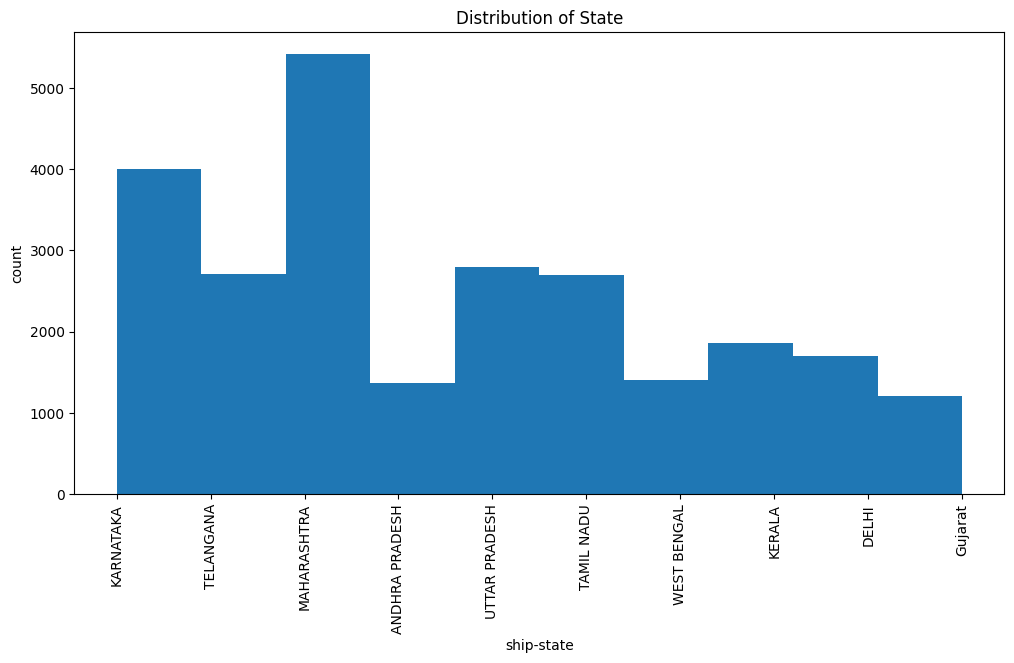

In [73]:
top=data["ship-state"].value_counts().head(10)
plt.figure(figsize=(12, 6))
sns.countplot(data=data[data["ship-state"].isin(top.index)],x = "ship-state")
plt.xlabel('ship-state')
plt.ylabel('count')
plt.title('Distribution of State')
plt.xticks(rotation=90)
plt.show()


Text(0, 0.5, 'Size')

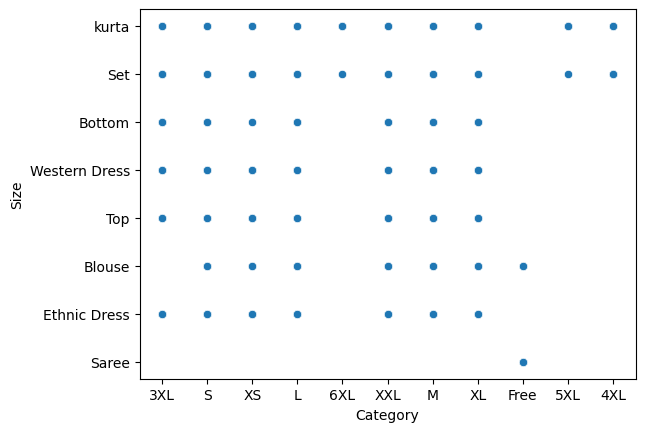

In [71]:
sns.scatterplot(x="Size",y="Category",data=data)
plt.xlabel("Category")
plt.ylabel("Size")

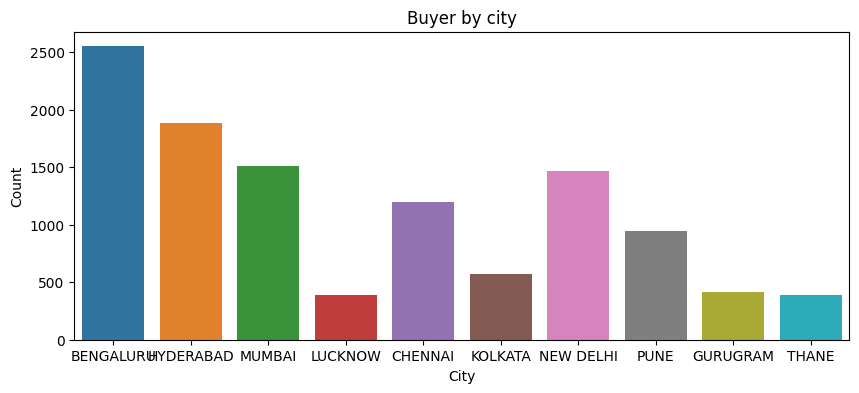

In [101]:
topcity=data["ship-city"].value_counts().head(10)
plt.figure(figsize=(10,4))
sns.countplot(data=data[data["ship-city"].isin(topcity.index)],x="ship-city",hue=ship-state)
plt.xlabel("City")
plt.ylabel("Count")
plt.title("Buyer by city")
plt.show()